C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update th

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1237, 64)       │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1237, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1237, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1237, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1237, 3)        │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,995 (113.26 KB)

 Trainable params: 28,995 (113.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2749 - loss: 1.1036 - val_accuracy: 0.8436 - val_loss: 1.0585
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step - accuracy: 0.7691 - loss: 1.0589 - val_accuracy: 0.8436 - val_loss: 1.0143
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - accuracy: 0.7812 - loss: 1.0220 - val_accuracy: 0.8436 - val_loss: 0.9738
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.7829 - loss: 0.9890 - val_accuracy: 0.8436 - val_loss: 0.9364
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.7822 - loss: 0.9618 - val_accuracy: 0.8436 - val_loss: 0.9018
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 488ms/step - accuracy: 0.7825 - loss: 0.9401 - val_accuracy: 0.8436 - val_loss: 0.8696
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 465ms/step - accuracy: 0.7823 - loss: 0.9216 - val_accuracy: 0.8436 - val_loss: 0.8398
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step - accuracy: 0.7824 - loss: 0.9001 - val_accuracy: 0.8436 - val_

C:\Users\HP\AppData\Local\Temp\ipykernel_2780\3309685948.py:111: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  writer.append_data(imageio.imread(frame))


GIF saved at weights_frames\weights_evolution.gif
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9127 - loss: 0.2172
Test Accuracy: 91.27%


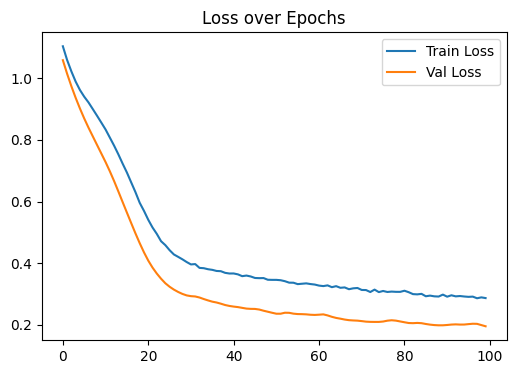

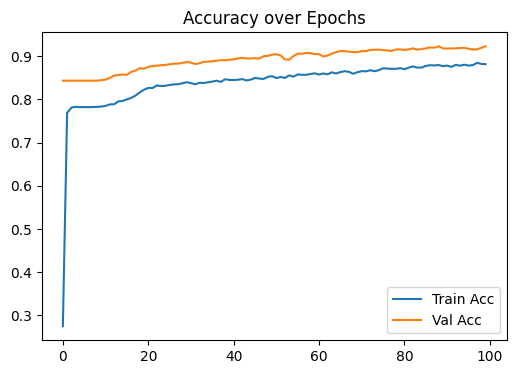

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


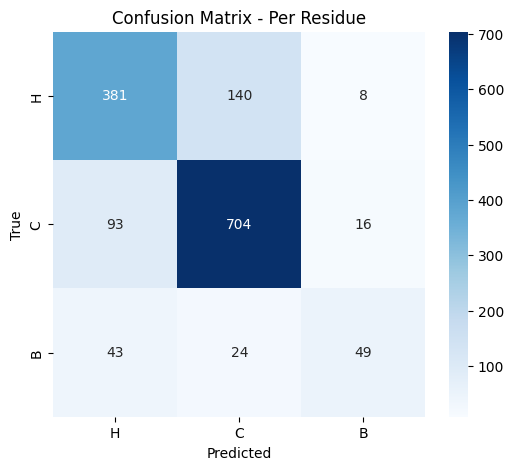

Classification Report:
              precision    recall  f1-score   support

           H       0.74      0.72      0.73       529
           C       0.81      0.87      0.84       813
           B       0.67      0.42      0.52       116

    accuracy                           0.78      1458
   macro avg       0.74      0.67      0.69      1458
weighted avg       0.77      0.78      0.77      1458

Per-residue Accuracy: 77.78%


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from Bio import SeqIO
import matplotlib.pyplot as plt
import os
import seaborn as sns
import imageio
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# -------------------------------
# Step 1: Load and encode FASTA
# -------------------------------
def one_hot_encode_seq(seq, max_len):
    """One-hot encode protein sequence (Amino acids A-Z)"""
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"  # 20 common
    aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}
    encoding = np.zeros((max_len, len(amino_acids)), dtype=np.float32)
    for i, aa in enumerate(seq):
        if i >= max_len:
            break
        if aa in aa_to_int:
            encoding[i, aa_to_int[aa]] = 1.0
    return encoding

def parse_ss2_file(filepath):
    aa_seq = []
    ss_seq = []
    with open(filepath, 'r') as f:
        for line in f:
            if line.startswith('#') or not line.strip():
                continue
            parts = line.split()
            if len(parts) >= 3:
                aa_seq.append(parts[1])  # amino acid
                ss_seq.append(parts[2])  # secondary structure
    ss_seq = [s.replace('E', 'B') for s in ss_seq]
    return "".join(aa_seq), "".join(ss_seq)

def get_secondary_structure_from_ss2_file(folder_path, filename):
    filepath = os.path.join(folder_path, filename)
    _, ss_seq = parse_ss2_file(filepath)
    return ss_seq

# Load sequences from FASTA
fasta_path = "sequences.fasta"  # your file
ss_folder_path = r'C:\Users\HP\Desktop\BME\BMEass\Protein Structures(2D)'
records = list(SeqIO.parse(fasta_path, "fasta"))
max_len = max(len(record.seq) for record in records)  # pad to longest sequence

X = np.array([one_hot_encode_seq(str(record.seq), max_len) for record in records])
y_ss = np.array([get_secondary_structure_from_ss2_file(ss_folder_path, record.id + ".ss2") for record in records])

# Map secondary structure to integer labels
ss_map = {'H': 0, 'C': 1, 'B': 2}
y_labels = np.array([
    [ss_map.get(s, 1) for s in ss][:max_len] + [1]*(max_len - len(ss))  # pad with 'C' (1) if needed
    for ss in y_ss
])

num_classes = 3
y_cat = to_categorical(y_labels, num_classes=num_classes)

# -------------------------------
# Step 3: Train/Val/Test split
# -------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# -------------------------------
# Step 4: Build CNN Model
# -------------------------------
model = Sequential([
    Conv1D(64, kernel_size=3, activation="relu", padding="same", input_shape=(max_len, X.shape[2])),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation="relu", padding="same"),
    Dropout(0.3),
    Conv1D(num_classes, kernel_size=1, activation="softmax", padding="same")  # per-residue prediction
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# -------------------------------
# Step 4.5: Callback for Weight GIFs
# -------------------------------
class WeightsGIFCallback(Callback):
    def __init__(self, save_dir="weights_frames"):
        super().__init__()
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)
        self.epoch_frames = []

    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]  # Conv1D kernel
        plt.figure(figsize=(6, 4))
        sns.heatmap(weights[:, 0, :], cmap="viridis")
        plt.title(f"Conv1D Weights - Epoch {epoch+1}")
        frame_path = os.path.join(self.save_dir, f"epoch_{epoch+1}.png")
        plt.savefig(frame_path)
        plt.close()
        self.epoch_frames.append(frame_path)

    def on_train_end(self, logs=None):
        gif_path = os.path.join(self.save_dir, "weights_evolution.gif")
        with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
            for frame in self.epoch_frames:
                writer.append_data(imageio.imread(frame))
        print(f"GIF saved at {gif_path}")

gif_callback = WeightsGIFCallback()

# -------------------------------
# Step 5: Train
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[gif_callback]
)

# -------------------------------
# Step 6: Evaluate
# -------------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

# -------------------------------
# Step 7: Plot loss and accuracy
# -------------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()
# -------------------------------
# Step 8: Confusion Matrix & Metrics
# -------------------------------

# Predict on test set
y_pred_probs = model.predict(X_test)  # shape: (samples, max_len, num_classes)
y_pred_classes = np.argmax(y_pred_probs, axis=-1)
y_true_classes = np.argmax(y_test, axis=-1)

# Flatten sequences for per-residue classification metrics
y_pred_flat = y_pred_classes.flatten()
y_true_flat = y_true_classes.flatten()

# Remove padding positions (optional)
mask = ~(np.all(X_test == 0, axis=2).flatten())  # True for real residues
y_pred_flat = y_pred_flat[mask]
y_true_flat = y_true_flat[mask]

# Confusion matrix
cm = confusion_matrix(y_true_flat, y_pred_flat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['H', 'C', 'B'],
            yticklabels=['H', 'C', 'B'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Per Residue")
plt.show()

# Classification metrics
print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat, target_names=['H', 'C', 'B']))

# Accuracy
acc = accuracy_score(y_true_flat, y_pred_flat)
print(f"Per-residue Accuracy: {acc*100:.2f}%")


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.9 MB 6.7 MB/s eta 0:00:50
   ---------------------------------------- 2.4/331.9 MB 5.8 MB/s eta 0:00:57
   ---------------------------------------- 3.4/331.9 MB 5.4 MB/s eta 0:01:01
    --------------------------------------- 4.5/331.9 MB 5.3 MB/s eta 0:01:03
    --------------------------------------- 5.5/331.9 MB 5.2 MB/s eta 0:01:03
    --------------------------------------- 6.6/331.9 MB 5.2 MB/s eta 0:01:03
    --------------------------------------- 7.6/331.9 MB 5.2 MB/s eta 0:01:03
   - -------------------------------------- 8.7/331.9 MB 5.0 MB/s eta 0:01:05
   - -------------------------------------- 9.4/331.9 MB 5.0 MB/s eta 0:01:05
   - -------------------------------------- 10.5/331.9 MB 5.0 MB/s eta 0:01:05
   - -------------------------------------- 11.5/331.9 MB 4.9 MB/s eta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio.v2 as imageio  # v2 API is stable
import pandas as pd

from Bio import SeqIO
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback

# =======================
# Output dirs
# =======================
OUT_FIG = "outputs/figures"
OUT_MET = "outputs/metrics"
OUT_MOD = "outputs/models"
OUT_WEI = "outputs/weights_viz"
for d in (OUT_FIG, OUT_MET, OUT_MOD, OUT_WEI):
    os.makedirs(d, exist_ok=True)

# =======================
# Step 1: Load and encode FASTA
# =======================
def one_hot_encode_seq(seq, max_len):
    """One-hot encode protein sequence (Amino acids A-Z)"""
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"  # 20 common
    aa_to_int = {aa: i for i, aa in enumerate(amino_acids)}
    encoding = np.zeros((max_len, len(amino_acids)), dtype=np.float32)
    for i, aa in enumerate(seq):
        if i >= max_len:
            break
        if aa in aa_to_int:
            encoding[i, aa_to_int[aa]] = 1.0
    return encoding

def parse_ss2_file(filepath):
    aa_seq, ss_seq = [], []
    with open(filepath, 'r') as f:
        for line in f:
            if line.startswith('#') or not line.strip():
                continue
            parts = line.split()
            if len(parts) >= 3:
                aa_seq.append(parts[1])  # amino acid
                ss_seq.append(parts[2])  # secondary structure
    # map E->B to keep 3-state labels (H,C,B)
    ss_seq = [s.replace('E', 'B') for s in ss_seq]
    return "".join(aa_seq), "".join(ss_seq)

def get_secondary_structure_from_ss2_file(folder_path, filename):
    filepath = os.path.join(folder_path, filename)
    _, ss_seq = parse_ss2_file(filepath)
    return ss_seq

# ---------- Load sequences + labels ----------
fasta_path = "sequences.fasta"  # your FASTA
ss_folder_path = r'C:\Users\HP\Desktop\BME\BMEass\Protein Structures(2D)'

records = list(SeqIO.parse(fasta_path, "fasta"))
max_len = max(len(record.seq) for record in records)

X = np.array([one_hot_encode_seq(str(record.seq), max_len) for record in records])
y_ss = np.array([get_secondary_structure_from_ss2_file(ss_folder_path, record.id + ".ss2") for record in records])

# Map secondary structure to integer labels: H, C, B
ss_map = {'H': 0, 'C': 1, 'B': 2}
y_labels = np.array([
    [ss_map.get(s, 1) for s in ss][:max_len] + [1]*(max_len - len(ss))  # pad with 'C'
    for ss in y_ss
])

num_classes = 3
y_cat = to_categorical(y_labels, num_classes=num_classes)

# =======================
# Step 3: Train/Val/Test split
# =======================
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# =======================
# Step 4: Model
# =======================
model = Sequential([
    Conv1D(64,  kernel_size=3, activation="relu", padding="same", input_shape=(max_len, X.shape[2]), name="conv1"),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation="relu", padding="same", name="conv2"),
    Dropout(0.3),
    Conv1D(num_classes, kernel_size=1, activation="softmax", padding="same", name="head")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# =======================
# Step 4.5: Weight-update GIFs (line plots like your screenshots)
# =======================
class Conv1DFilterLinesCallback(Callback):
    """
    For each Conv1D layer:
      - L2 norm per output filter: ||W[:,:,j]||_2
      - ΔW L2 per filter vs previous epoch
      - Saves PNG frames and builds GIFs on train end
      - Also writes CSV with (epoch, filter_index, l2, delta_l2)
    """
    def __init__(self, save_root=OUT_WEI, fps=2, also_plot_deltas=True, every_n_epochs=1):
        super().__init__()
        self.save_root = save_root
        self.fps = fps
        self.also_plot_deltas = also_plot_deltas
        self.every_n = every_n_epochs
        self.prev = {}
        self.frames = {}
        self.csv_paths = {}

    @staticmethod
    def _filter_l2s(W):
        # Conv1D kernel shape: [K, Cin, Cout] -> per-filter norm [Cout]
        return np.sqrt(np.sum(W**2, axis=(0, 1)))

    def on_train_begin(self, logs=None):
        for layer in self.model.layers:
            if not isinstance(layer, Conv1D):
                continue
            layer_dir = os.path.join(self.save_root, layer.name)
            os.makedirs(layer_dir, exist_ok=True)
            self.frames[layer.name] = {"l2": [], "dl2": []}
            csv_path = os.path.join(layer_dir, f"{layer.name}_filter_metrics.csv")
            self.csv_paths[layer.name] = csv_path
            with open(csv_path, "w", newline="") as f:
                import csv
                csv.writer(f).writerow(["epoch", "filter_index", "l2", "delta_l2"])

    def on_epoch_end(self, epoch, logs=None):
        e = epoch + 1
        if e % self.every_n != 0:
            return

        for layer in self.model.layers:
            if not isinstance(layer, Conv1D):
                continue
            weights = layer.get_weights()
            if not weights:
                continue
            W = weights[0]  # [K, Cin, Cout]
            if W.ndim != 3:
                continue

            l2 = self._filter_l2s(W)
            dl2 = None
            if layer.name in self.prev:
                dW = W - self.prev[layer.name]
                dl2 = self._filter_l2s(dW)

            # ----- L2 plot -----
            fig, ax = plt.subplots(figsize=(7, 3.2))
            xs = np.arange(1, len(l2)+1)
            ax.plot(xs, l2, marker='o')
            ax.set_title(f"{layer.name} — Filter L2 norms (epoch {e})")
            ax.set_xlabel("Filter index")
            ax.set_ylabel("L2 norm")
            fig.tight_layout()
            layer_dir = os.path.join(self.save_root, layer.name)
            p_l2 = os.path.join(layer_dir, f"{layer.name}_l2_{e:04d}.png")
            fig.savefig(p_l2, dpi=140); plt.close(fig)
            self.frames[layer.name]["l2"].append(p_l2)

            # ----- ΔL2 plot -----
            if self.also_plot_deltas and dl2 is not None:
                fig2, ax2 = plt.subplots(figsize=(7, 3.2))
                ax2.plot(xs, dl2, marker='o')
                ax2.set_title(f"{layer.name} — ΔW L2 per filter (epoch {e})")
                ax2.set_xlabel("Filter index")
                ax2.set_ylabel("ΔW L2")
                fig2.tight_layout()
                p_dl2 = os.path.join(layer_dir, f"{layer.name}_dl2_{e:04d}.png")
                fig2.savefig(p_dl2, dpi=140); plt.close(fig2)
                self.frames[layer.name]["dl2"].append(p_dl2)

            # ----- CSV append -----
            with open(self.csv_paths[layer.name], "a", newline="") as f:
                import csv
                w = csv.writer(f)
                for j, v in enumerate(l2):
                    w.writerow([e, j, f"{v:.6f}", "" if dl2 is None else f"{dl2[j]:.6f}"])

            self.prev[layer.name] = W.copy()

    def on_train_end(self, logs=None):
        # Build GIFs
        for lname, fr in self.frames.items():
            if fr["l2"]:
                gif_path = os.path.join(self.save_root, lname, f"0.GIF_{lname}_l2.gif")
                imageio.mimsave(gif_path, [imageio.imread(p) for p in fr["l2"]], fps=self.fps)
                print("[GIF]", gif_path)
            if self.also_plot_deltas and fr["dl2"]:
                gif_path = os.path.join(self.save_root, lname, f"0.GIF_{lname}_dl2.gif")
                imageio.mimsave(gif_path, [imageio.imread(p) for p in fr["dl2"]], fps=self.fps)
                print("[GIF]", gif_path)

# Attach the callback (makes GIFs while training progresses)
gif_callback = Conv1DFilterLinesCallback(
    save_root=OUT_WEI,
    fps=2,
    also_plot_deltas=True,
    every_n_epochs=1
)

# =======================
# Step 5: Train
# =======================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=8,
    callbacks=[gif_callback]
)

# Save model
model.save(os.path.join(OUT_MOD, "protein_cnn.h5"))

# =======================
# Step 6: Evaluate
# =======================
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

# =======================
# Step 7: Save loss & accuracy figures + history CSV
# =======================
pd.DataFrame(history.history).to_csv(os.path.join(OUT_MET, "history.csv"), index=False)

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.tight_layout()
plt.savefig(os.path.join(OUT_FIG, "loss.png"), dpi=160)
plt.close()

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy over Epochs")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.tight_layout()
plt.savefig(os.path.join(OUT_FIG, "accuracy.png"), dpi=160)
plt.close()

# =======================
# Step 8: Confusion Matrix & Metrics
# =======================
y_pred_probs   = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred_probs, axis=-1)
y_true_classes = np.argmax(y_test, axis=-1)

# Flatten per-residue (sequence labeling)
y_pred_flat = y_pred_classes.flatten()
y_true_flat = y_true_classes.flatten()

# Remove padding positions (rows where input is all zeros)
mask = ~(np.all(X_test == 0, axis=2).flatten())
y_pred_flat = y_pred_flat[mask]
y_true_flat = y_true_flat[mask]

cm = confusion_matrix(y_true_flat, y_pred_flat)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['H','C','B'], yticklabels=['H','C','B'])
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix - Per Residue")
plt.tight_layout()
plt.savefig(os.path.join(OUT_FIG, "confusion_matrix.png"), dpi=160)
plt.close()

# Classification report to file
with open(os.path.join(OUT_MET, "classification_report.txt"), "w") as f:
    f.write(classification_report(y_true_flat, y_pred_flat, target_names=['H','C','B']))

# Print accuracy to console too
acc_pr = accuracy_score(y_true_flat, y_pred_flat)
print(f"Per-residue Accuracy: {acc_pr*100:.2f}%")

print("\nSaved:")
print(f"  - Model:            {os.path.join(OUT_MOD, 'protein_cnn.h5')}")
print(f"  - Loss curve:       {os.path.join(OUT_FIG, 'loss.png')}")
print(f"  - Accuracy curve:   {os.path.join(OUT_FIG, 'accuracy.png')}")
print(f"  - Confusion matrix: {os.path.join(OUT_FIG, 'confusion_matrix.png')}")
print(f"  - History CSV:      {os.path.join(OUT_MET, 'history.csv')}")
print(f"  - Class report:     {os.path.join(OUT_MET, 'classification_report.txt')}")
print(f"  - Weight GIFs:      {OUT_WEI}/<layer>/*.gif")


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv1D)                  │ (None, 1237, 64)       │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1237, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 1237, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1237, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ head (Conv1D)                   │ (None, 1237, 3)        │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,995 (113.26 KB)

 Trainable params: 28,995 (113.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2750 - loss: 1.1111 - val_accuracy: 0.7736 - val_loss: 1.0644
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7081 - loss: 1.0710 - val_accuracy: 0.8314 - val_loss: 1.0270
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7568 - loss: 1.0378 - val_accuracy: 0.8432 - val_loss: 0.9920
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7744 - loss: 1.0098 - val_accuracy: 0.8436 - val_loss: 0.9587
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7820 - loss: 0.9835 - val_accuracy: 0.8436 - val_loss: 0.9273
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7821 - loss: 0.9624 - val_accuracy: 0.8436 - val_loss: 0.8981
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7822 - loss: 0.9425 - val_accuracy: 0.8436 - val_loss: 0.8701
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7822 - loss: 0.9211 - val_accuracy: 0.8436 - val_loss: 0.8423
Epoch 9/

Test Accuracy: 91.48%
Per-residue Accuracy: 78.33%

Saved:
  - Model:            outputs/models\protein_cnn.h5
  - Loss curve:       outputs/figures\loss.png
  - Accuracy curve:   outputs/figures\accuracy.png
  - Confusion matrix: outputs/figures\confusion_matrix.png
  - History CSV:      outputs/metrics\history.csv
  - Class report:     outputs/metrics\classification_report.txt
  - Weight GIFs:      outputs/weights_viz/<layer>/*.gif
